#ML
#linear Regresion
Regression -Machine Learning Regression is a technique for investigating the relationship between independent variables or features and a dependent variable or outcome. It's used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.

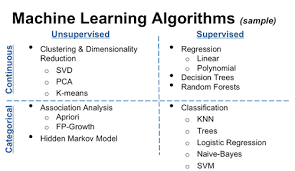

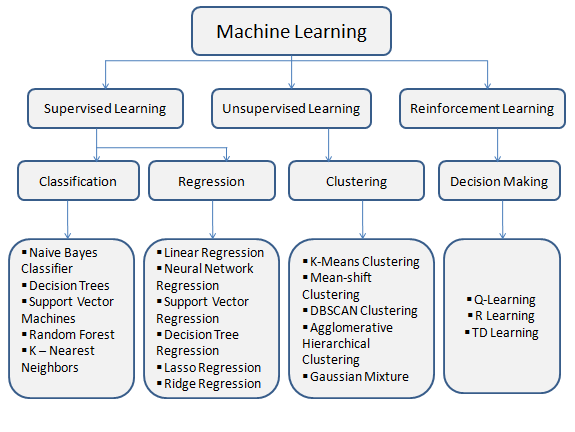

in unsupervised Learning we also have "Association"

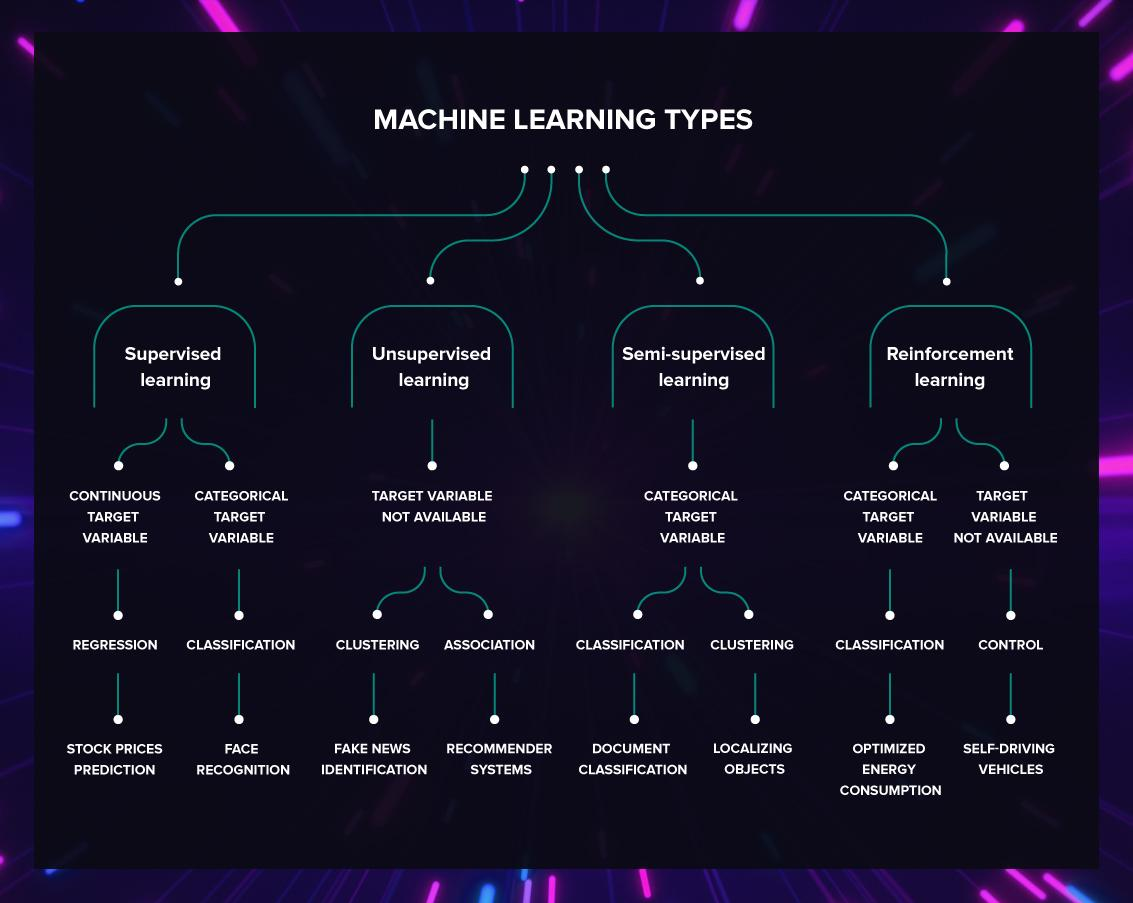

In [ ]:
#linear regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data=sns.load_dataset("diamonds")

In [ ]:
data.shape

(53940, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
data[data["carat"] == 5.01]

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.head(1000)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
995,0.54,Ideal,D,VVS2,61.4,52.0,2897,5.30,5.34,3.26
996,0.72,Ideal,E,SI1,62.5,55.0,2897,5.69,5.74,3.57
997,0.72,Good,F,VS1,59.4,61.0,2897,5.82,5.89,3.48
998,0.74,Premium,D,VS2,61.8,58.0,2897,5.81,5.77,3.58


In [ ]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data= data.drop(["x","y","z"],axis=1 )


In [ ]:
data.drop([ "clarity","color"],axis=1,inplace=True)

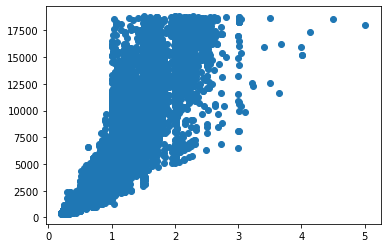

In [ ]:
plt.scatter(data=data,x="carat",y="price" )

This is a great start as there are no missing values in this dataset to deal with, which obviously is a rare scenario.

Proceeding with data exploration through plotting.

Text(0.5, 1.0, 'Distribution of Diamond Price')

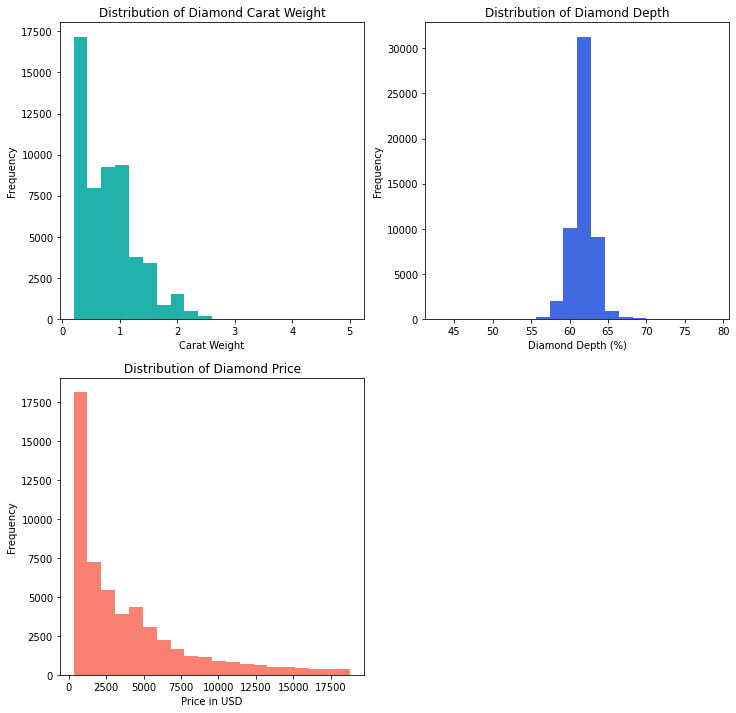

In [ ]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(data['carat'],bins=20,color='lightseagreen')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(data['depth'],bins=20,color='royalblue')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(data['price'],bins=20,color='salmon')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

<AxesSubplot:xlabel='price', ylabel='price'>

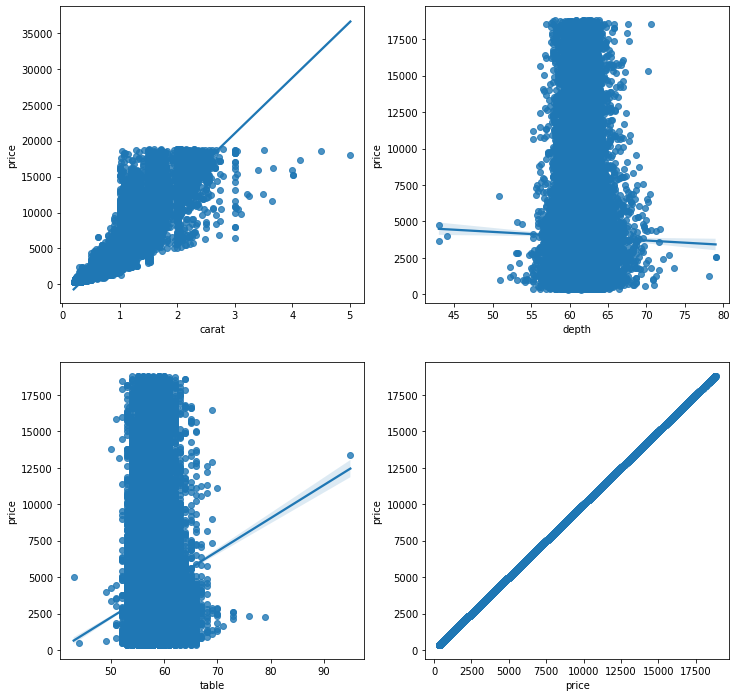

In [ ]:
fig, saxis = plt.subplots(2, 2,figsize=(12,12))

sns.regplot(x = 'carat', y = 'price', data=data, ax = saxis[0,0])
sns.regplot(x = 'depth', y = 'price', data=data, ax = saxis[0,1])
sns.regplot(x = 'table', y = 'price', data=data, ax = saxis[1,0])
sns.regplot(x = 'price', y = 'price', data=data, ax = saxis[1,1]) #univariant

In [ ]:
data

,carat,cut,depth,table,price
0,0.23,Ideal,61.5,55.0,326
1,0.21,Premium,59.8,61.0,326
2,0.23,Good,56.9,65.0,327
3,0.29,Premium,62.4,58.0,334
4,0.31,Good,63.3,58.0,335
...,...,...,...,...,...
53935,0.72,Ideal,60.8,57.0,2757
53936,0.72,Good,63.1,55.0,2757
53937,0.70,Very Good,62.8,60.0,2757
53938,0.86,Premium,61.0,58.0,2757


In [ ]:
data.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
data.corr()

,carat,depth,table,price
carat,1.000000,0.028224,0.181618,0.921591
depth,0.028224,1.000000,-0.295779,-0.010647
table,0.181618,-0.295779,1.000000,0.127134
price,0.921591,-0.010647,0.127134,1.000000


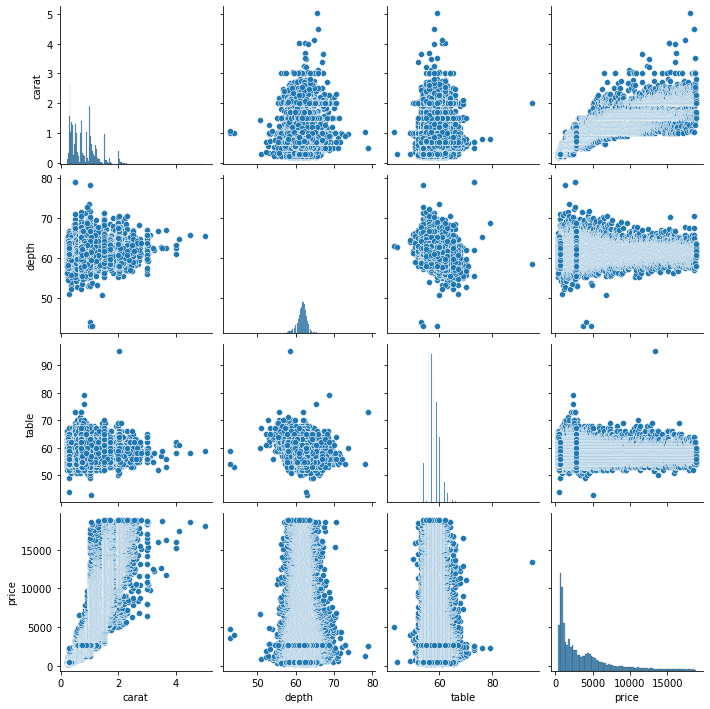

In [ ]:
sns.pairplot(data)

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
type(X)

pandas.core.frame.DataFrame

 **Label Encoded**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( transformers = [("encode",OneHotEncoder(),[1])],remainder = 'passthrough')
X=ct.fit_transform(X)

In [ ]:
X

array([[ 0.  ,  0.  ,  1.  , ...,  0.23, 61.5 , 55.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.21, 59.8 , 61.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.23, 56.9 , 65.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.7 , 62.8 , 60.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.86, 61.  , 58.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.75, 62.2 , 55.  ]])

In [ ]:
X=X[:,1:]

In [ ]:
X

array([[ 0.  ,  1.  ,  0.  , ...,  0.23, 61.5 , 55.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.21, 59.8 , 61.  ],
       [ 1.  ,  0.  ,  0.  , ...,  0.23, 56.9 , 65.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.7 , 62.8 , 60.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.86, 61.  , 58.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.75, 62.2 , 55.  ]])

In [ ]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

**Split the data into training and test dataset.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)
#LinearRegression()

In [ ]:
X_train

array([[ 0.  ,  1.  ,  0.  , ...,  1.63, 61.7 , 55.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.34, 62.2 , 57.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.4 , 61.7 , 56.  ],
       ...,
       [ 0.  ,  0.  ,  1.  , ...,  0.32, 61.3 , 58.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.41, 61.  , 57.  ],
       [ 0.  ,  1.  ,  0.  , ...,  0.91, 61.1 , 55.  ]])

In [ ]:
X_test

array([[ 0.  ,  1.  ,  0.  , ...,  1.1 , 62.  , 55.  ],
       [ 0.  ,  1.  ,  0.  , ...,  1.29, 62.6 , 56.  ],
       [ 0.  ,  0.  ,  1.  , ...,  1.2 , 61.1 , 58.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  1.08, 63.4 , 55.  ],
       [ 0.  ,  1.  ,  0.  , ...,  1.02, 61.5 , 57.  ],
       [ 1.  ,  0.  ,  0.  , ...,  0.5 , 64.8 , 58.  ]])

In [ ]:
y_test

10176    4733
16083    6424
13420    5510
20407    8770
8909     4493
         ... 
42208    1289
3638     3435
5508     3847
19535    8168
47950    1917
Name: price, Length: 10788, dtype: int64

In [ ]:
y_train

26250    15697
31510      765
40698     1158
42634     1332
47714     1885
         ...  
45891     1720
52416     2512
42613      505
43567     1431
2732      3246
Name: price, Length: 43152, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(X_train,y_train)


In [ ]:
model

LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.8585516717828419

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([6613.84857683, 8020.03330579, 7054.51255508, ..., 6137.14584971,
       5933.23423726, 1007.08773615])

**PERFORMANCE** **METRICS**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_predict)

2242193.6839859514

In [ ]:
r2_score(y_test, y_predict)

0.8585516717828419

In [ ]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test, y_predict)

982.2808121358772